In [182]:
dataset_df =pd.DataFrame()

day_lst = ["20170416", "20170417", "20170418", "20170420", "20170421"]
day_lst = ["20181030"]

for day in day_lst:
    for t_idx in range(9, 17):
        tmp_dataset_df = pd.read_csv("../../data/datasets/{0}/default/time_series_{1}.csv".format(day, t_idx))
    
        # check NaN count
        assert tmp_dataset_df.isnull().values.sum() == 0

        dataset_df = pd.concat([dataset_df, tmp_dataset_df])

    # shuffle dataset
    #dataset_df = dataset_df.sample(frac=1)
    dataset_df = dataset_df.fillna(0)

    # check NaN count
    assert dataset_df.isnull().values.sum() == 0
    
    
dataset_df.head()

,Fri,Mon,Sat,Sun,Thurs,Tue,Wed,area_ratio,degree_mean,degree_std,...,overall_dir_left_down,overall_dir_left_up,overall_dir_right,overall_dir_right_down,overall_dir_right_up,right,right_down,right_up,up,var
0,0,0,1,0,0,0,0,0.000030,149.783784,119.499663,...,0.0,0,1,0,0,0.297297,0.054054,0.189189,0.027027,0.0000
1,0,0,1,0,0,0,0,0.000045,121.428571,116.511422,...,0.0,0,1,0,0,0.357143,0.119048,0.095238,0.000000,19.7564
2,0,0,1,0,0,0,0,0.000000,106.333333,124.348301,...,0.0,0,1,0,0,0.472222,0.083333,0.111111,0.027778,23.1904
3,0,0,1,0,0,0,0,0.000045,111.000000,140.305549,...,0.0,0,1,0,0,0.500000,0.088235,0.205882,0.000000,20.9167
4,0,0,1,0,0,0,0,0.000000,86.454545,129.904415,...,0.0,0,1,0,0,0.666667,0.060606,0.090909,0.000000,21.9560


In [184]:
thresh_lst = []
for t in range(9, 17):
    thresh_df = pd.read_csv("../../data/statistics/20170422/{}/acc_thresh.csv".format(t))
    thresh_lst.extend(list(thresh_df[thresh_df["frame_num"]%30 == 0]["acc_thresh"]))

In [185]:
np.min(thresh_lst[100:])

150.0

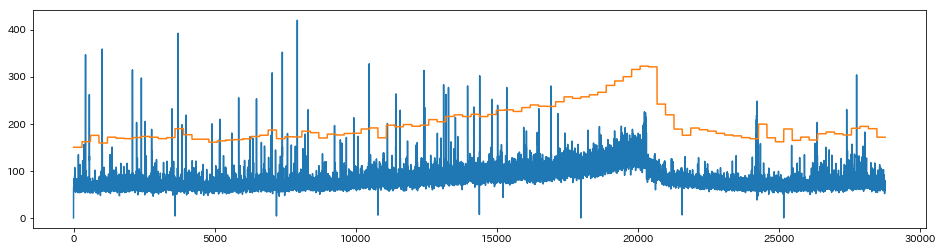

In [186]:
plt.figure(figsize=(16, 4))
plt.plot(list(dataset_df["max"]))
plt.plot(thresh_lst)

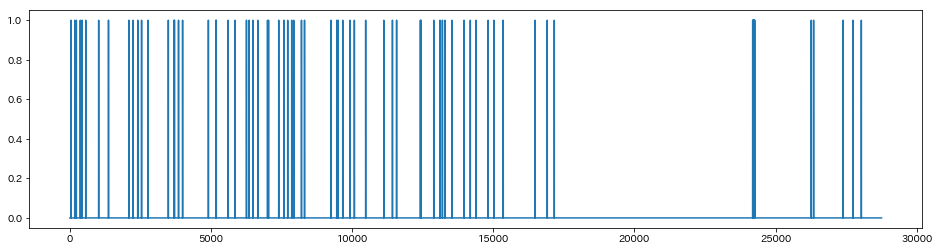

In [187]:
plt.figure(figsize=(16, 4))
plt.plot(list(dataset_df["label"]))

In [188]:
# check data balance, and convert numpy
y_train = dataset_df["label"].values
print("***************** Train *****************")
print("Normal: {}".format(np.sum(y_train==0)))
print("Anormal: {}".format(np.sum(y_train==1)))
print("Anormaly rate [%]: {}".format(100*(np.sum(y_train==1)/np.sum(y_train==0))))

dataset_df = dataset_df.drop(["label"], axis=1)
X_train = dataset_df.values

***************** Train *****************
Normal: 28615
Anormal: 141
Anormaly rate [%]: 0.49274855844836624


In [189]:
test_df = pd.DataFrame(columns=dataset_df.columns)

for t_idx in range(9, 17):
    tmp_test_df = pd.read_csv("../../data/datasets/20170422/normalize/time_series_{0}.csv".format(t_idx))

    # check NaN count
    assert tmp_test_df.isnull().values.sum() == 0

    test_df = pd.concat([test_df, tmp_test_df])


test_df = test_df.fillna(0)

# check NaN count
assert test_df.isnull().values.sum() == 0
    
# check data balance, and convert numpy
y_test = test_df["label"].values
print("***************** Test *****************")
print("Normal: {}".format(np.sum(y_test==0)))
print("Anormal: {}".format(np.sum(y_test==1)))
print("Anormaly rate [%]: {}".format(100*(np.sum(y_test==1)/np.sum(y_test==0))))

#test_df = test_df.drop(["label", "max"], axis=1)
test_df = test_df.drop("label", axis=1)
X_test = test_df.values

***************** Test *****************
Normal: 28672
Anormal: 84
Anormaly rate [%]: 0.29296875
